# Eficiencia intrínseca de los detectores A y D

#### Este Notebook corresponde al análisis de los detectores BC, es decir, tomaremos los datos con confirguraciones de trigger en AD.

In [77]:
import numpy as np
import matplotlib.pylab as plt
import scipy.optimize as so
import scipy.special as se #para el factorial
import pandas as pd
from decimal import * #para las cifras significativas
from tabulate import tabulate

In [78]:
def leerArchivo(archivo):
    completo = open(archivo, 'r')
    tiempos = []
    datos = []
    contador = 0
    for linea in completo: #recorremos cada línea del archivo
        if len(linea) == 1: #len cuenta los bytes de cada linea: si tiene 1 byte es porque cuenta el salto de linea como \n
            continue
        else: #en otro caso, será algún dato de interés
            numero_elementos = linea.split() #guardamos los elementos de la línea
            if len(numero_elementos) == 1: #si hay un solo elemento, será el tiempo unix
                tiempos.append(numero_elementos)
                contador += 1
            else: #en otro caso, será alguno de los otros datos
                datos.append(numero_elementos)
                contador += 1
    
    #el resultado de este bucle es una lista de listas, lo cual no nos interesa porque queremos trabajar con elementos que sean números
    tamaño = len(tiempos)
    tiempos_unix = [] #almacenamos aquí el tiempo unix
    for i in range(tamaño):
        tiempos_unix.append(int(tiempos[i][0]))
    
    #leemos también los datos de los tiempos en ns y las amplitudes de la señal
    tiempos_volt = [] #tiempos de registro de amplitudes de señal (cada 4 ns)
    numero_iteraciones = len(datos)
    for j in range(numero_iteraciones):
        tiempos_volt.append(int(datos[j][0]))
    medidasA = [] #amplitudes detector A
    for k in range(numero_iteraciones):
        medidasA.append(int(datos[k][1]))
    medidasB = [] #amplitudes detector B
    for l in range(numero_iteraciones):
        medidasB.append(int(datos[l][2]))
    medidasC = [] #amplitudes detector C
    for m in range(numero_iteraciones):
        medidasC.append(int(datos[m][3]))
    medidasD = [] #amplitudes detector D
    for n in range(numero_iteraciones):
        medidasD.append(int(datos[n][4]))
    
    return tiempos_unix, tiempos_volt, medidasA, medidasB, medidasC, medidasD, datos

In [107]:
medidas = leerArchivo('BC_1050mv.txt')[6]
unix = leerArchivo('BC_1050mv.txt')[0]

#la función nos devuelve listas con strings, así que pasamos los elementos a float
for i in range(len(medidas)):
    for j in range(len(medidas[i])):
        if type(medidas[i][j]) == str:
            medidas[i][j] = float(medidas[i][j])

#número de triggers = número de tiempos unix
n_sep = len(unix)
#creamos una lista de n_sep listas vacías donde almacenaremos los datos de cada medida
datos = [[] for k in range(n_sep)]

i = 1
for j in range(len(datos)):
    while medidas[i-1][0] < medidas[i][0] and i < (len(medidas)-1):
        datos[j].append(medidas[i-1])
        i += 1
    else:
        i += 1

Determinamos los mínimos de cada evento:

In [108]:
t_min_A = []
t_min_B = []
t_min_C = []
t_min_D = []

V_min_A = []
V_min_B = []
V_min_C = []
V_min_D = []

def parabola(x, a, b, c):
    return a*x**2 + b*x + c

for i in range(len(datos)):
    
    t = []
    
    detA = []
    detB = []
    detC = []
    detD = []
    
    for j in range(len(datos[i])):
        t.append(datos[i][j][0])
        detA.append(datos[i][j][1])
        detB.append(datos[i][j][2])
        detC.append(datos[i][j][3])
        detD.append(datos[i][j][4])
    
    t_aux = np.linspace(30,100,1000)
    ###############################################
    indice_min_A = detA.index(min(detA))
    if indice_min_A == (len(detA)-1): #si el mínimo está en el último elemento, añade una nueva línea igual a la penúltima para poder hacer el ajuste a tres puntos
                detA.append(detA[indice_min_A-1])
                t.append(t[indice_min_A] + t[indice_min_A] - t[indice_min_A])
    lA = indice_min_A
    tA = [t[lA-1], t[lA], t[lA+1]]
    ajusteA = [detA[lA-1], detA[lA], detA[lA+1]]
    if min(detA) < -50:
        solA, covA = so.curve_fit(parabola, tA, ajusteA)
        aA = solA[0] ; bA = solA[1] ; cA = solA[2]
        VA = aA*t_aux**2 + bA*t_aux + cA
        V_min_A.append(min(VA))
        t_min_A.append(t_aux[list(VA).index(min(VA))])
    else:
        V_min_A.append(0)
        t_min_A.append(0)
    ###############################################
    indice_min_B = detB.index(min(detB))
    if indice_min_B == (len(detB)-1):
                detB.append(detB[indice_min_B-1])
                t.append(t[indice_min_B] + t[indice_min_B] - t[indice_min_B])
    lB = indice_min_B
    tB = [t[lB-1], t[lB], t[lB+1]]
    ajusteB = [detB[lB-1], detB[lB], detB[lB+1]]
    if min(detB) < -50:
        solB, covB = so.curve_fit(parabola, tB, ajusteB)
        aB = solB[0] ; bB = solB[1] ; cB = solB[2]
        VB = aB*t_aux**2 + bB*t_aux + cB
        V_min_B.append(min(VB))
        t_min_B.append(t_aux[list(VB).index(min(VB))])
    else:
        V_min_B.append(0)
        t_min_B.append(0)
    ###############################################
    indice_min_C = detC.index(min(detC))
    if indice_min_C == (len(detC)-1):
                detC.append(detC[indice_min_C-1])
                t.append(t[indice_min_C] + t[indice_min_C] - t[indice_min_C])
    lC = indice_min_C
    tC = [t[lC-1], t[lC], t[lC+1]]
    ajusteC = [detC[lC-1], detC[lC], detC[lC+1]]
    if min(detC) < -50:
        solC, covC = so.curve_fit(parabola, tC, ajusteC)
        aC = solC[0] ; bC = solC[1] ; cC = solC[2]
        VC = aC*t_aux**2 + bC*t_aux + cC
        V_min_C.append(min(VC))
        t_min_C.append(t_aux[list(VC).index(min(VC))])
    else:
        V_min_C.append(0)
        t_min_C.append(0)
    ###############################################
    indice_min_D = detD.index(min(detD))
    if indice_min_D == (len(detD)-1):
                detD.append(detD[indice_min_D-1])
                t.append(t[indice_min_D] + t[indice_min_D] - t[indice_min_D])
    lD = indice_min_D
    tD = [t[lD-1], t[lD], t[lD+1]]
    if min(detD) < -50:
        ajusteD = [detD[lD-1], detD[lD], detD[lD+1]]
        solD, covD = so.curve_fit(parabola, tD, ajusteD)
        aD = solD[0] ; bD = solD[1] ; cD = solD[2]
        VD = aD*t_aux**2 + bD*t_aux + cD
        V_min_D.append(min(VD))
        t_min_D.append(t_aux[list(VD).index(min(VD))])
    else:
        V_min_D.append(0)
        t_min_D.append(0)
    ###############################################

Como el programa del laboratorio solo permitía configurar el trigger en A y B, las columnas no están ordenadas como los detectores. Guardamos los datos en orden en unas nuevas variables.

#### Conf BC ---> C1=C, C2=B, C3=A, C4=D

#### V = 900 mV

In [81]:
detA900 = V_min_C ### columnas no ordenadas con los detectores
detB900 = V_min_B
detC900 = V_min_A
detD900 = V_min_D

disparosA900 = 0
disparosD900 = 0

for i in range(len(detA900)):
    if abs(detA900[i]) >= 150:
        disparosA900 = disparosA900 + 1
    if abs(detD900[i]) >= 150:
        disparosD900 = disparosD900 + 1

In [82]:
print('-----------------------------------')
print('Número de disparos del detector A: ', disparosA900)
print('Número de disparos del detector D: ', disparosD900)

-----------------------------------
Número de disparos del detector A:  956
Número de disparos del detector D:  604


#### V = 920 mV

In [85]:
detA920 = V_min_C
detB920 = V_min_B
detC920 = V_min_A
detD920 = V_min_D

disparosA920 = 0
disparosD920 = 0

for i in range(len(detA920)):
    if abs(detA920[i]) >= 150:
        disparosA920 = disparosA920 + 1
    if abs(detD920[i]) >= 150:
        disparosD920 = disparosD920 + 1

In [86]:
print('-----------------------------------')
print('Número de disparos del detector A: ', disparosA920)
print('Número de disparos del detector D: ', disparosD920)

-----------------------------------
Número de disparos del detector A:  985
Número de disparos del detector D:  901


#### V = 940 mV

In [89]:
detA940 = V_min_C
detB940 = V_min_B
detC940 = V_min_A
detD940 = V_min_D

disparosA940 = 0
disparosD940 = 0

for i in range(len(detA940)):
    if abs(detA940[i]) >= 150:
        disparosA940 = disparosA940 + 1
    if abs(detD940[i]) >= 150:
        disparosD940 = disparosD940 + 1

In [90]:
print('-----------------------------------')
print('Número de disparos del detector A: ', disparosA940)
print('Número de disparos del detector D: ', disparosD940)

-----------------------------------
Número de disparos del detector A:  994
Número de disparos del detector D:  954


#### V = 960 mV

In [93]:
detA960 = V_min_C
detB960 = V_min_B
detC960 = V_min_A
detD960 = V_min_D

disparosA960 = 0
disparosD960 = 0

for i in range(len(detA960)):
    if abs(detA960[i]) >= 150:
        disparosA960 = disparosA960 + 1
    if abs(detD960[i]) >= 150:
        disparosD960 = disparosD960 + 1

In [94]:
print('-----------------------------------')
print('Número de disparos del detector A: ', disparosA960)
print('Número de disparos del detector D: ', disparosD960)

-----------------------------------
Número de disparos del detector A:  992
Número de disparos del detector D:  977


#### V = 980 mV

In [97]:
detA980 = V_min_C
detB980 = V_min_B
detC980 = V_min_A
detD980 = V_min_D

disparosA980 = 0
disparosD980 = 0

for i in range(len(detA980)):
    if abs(detA980[i]) >= 150:
        disparosA980 = disparosA980 + 1
    if abs(detD980[i]) >= 150:
        disparosD980 = disparosD980 + 1

In [98]:
print('-----------------------------------')
print('Número de disparos del detector A: ', disparosA980)
print('Número de disparos del detector D: ', disparosD980)

-----------------------------------
Número de disparos del detector A:  996
Número de disparos del detector D:  982


#### V = 1000 mV

In [101]:
detA1000 = V_min_C
detB1000 = V_min_B
detC1000 = V_min_A
detD1000 = V_min_D

disparosA1000 = 0
disparosD1000 = 0

for i in range(len(detA1000)):
    if abs(detA1000[i]) >= 150:
        disparosA1000 = disparosA1000 + 1
    if abs(detD1000[i]) >= 150:
        disparosD1000 = disparosD1000 + 1

In [102]:
print('-----------------------------------')
print('Número de disparos del detector A: ', disparosA1000)
print('Número de disparos del detector D: ', disparosD1000)

-----------------------------------
Número de disparos del detector A:  994
Número de disparos del detector D:  996


#### V = 1020 mV

In [105]:
detA1020 = V_min_C
detB1020 = V_min_B
detC1020 = V_min_A
detD1020 = V_min_D

disparosA1020 = 0
disparosD1020 = 0

for i in range(len(detA1020)):
    if abs(detA1020[i]) >= 150:
        disparosA1020 = disparosA1020 + 1
    if abs(detD1020[i]) >= 150:
        disparosD1020 = disparosD1020 + 1

In [106]:
print('-----------------------------------')
print('Número de disparos del detector A: ', disparosA1020)
print('Número de disparos del detector D: ', disparosD1020)

-----------------------------------
Número de disparos del detector A:  995
Número de disparos del detector D:  993


#### V = 1050 mV

In [109]:
detA1050 = V_min_C
detB1050 = V_min_B
detC1050 = V_min_A
detD1050 = V_min_D

disparosA1050 = 0
disparosD1050 = 0

for i in range(len(detA1050)):
    if abs(detA1050[i]) >= 150:
        disparosA1050 = disparosA1050 + 1
    if abs(detD1050[i]) >= 150:
        disparosD1050 = disparosD1050 + 1

In [110]:
print('-----------------------------------')
print('Número de disparos del detector A: ', disparosA1050)
print('Número de disparos del detector D: ', disparosD1050)

-----------------------------------
Número de disparos del detector A:  997
Número de disparos del detector D:  995


###############################################################################################################################

### Resultados

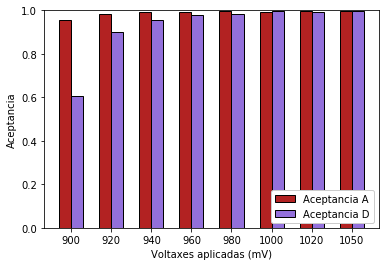

In [126]:
#definimos los vectores donde almacenamos los resultados
disparosA = np.array([disparosA900, disparosA920, disparosA940, disparosA960, disparosA980, disparosA1000, disparosA1020, disparosA1050])
disparosD = np.array([disparosD900, disparosD920, disparosD940, disparosD960, disparosD980, disparosD1000, disparosD1020, disparosD1050])

#definimos también el % de detección
disparos_totales = 1000 # =len(detA)=len(detD)
#es necesario introducir el parámetro geométrico en este caso, pues haciendo trigger en BC no nos aseguramos de que el muón
#haya pasado por AD (calculado en el MC para 2 detectores consecutivos)
EfGeom = 0.9588
EfA = disparosA / (disparos_totales)
EfD= disparosD / (disparos_totales)

voltajes = ['900', '920', '940', '960', '980', '1000', '1020', '1050']
  
X_axis = np.arange(len(voltajes))
  
plt.bar(X_axis - 0.15, EfA, width = 0.3, label = 'Aceptancia A', color='firebrick', edgecolor='black')
plt.bar(X_axis + 0.15, EfD, width = 0.3, label = 'Aceptancia D', color='mediumpurple', edgecolor='black')
  
plt.xticks(X_axis, voltajes)
plt.xlabel("Voltaxes aplicadas (mV)")
plt.ylabel("Aceptancia")
#plt.title("Eficiencia de los detectores")
plt.ylim(0,1)
plt.legend(loc='lower right', framealpha=1)
plt.savefig('EfAD.pdf')
plt.show()

In [112]:
#Mostramos los resultados para A
resultados = [['900', disparosA[0] , EfA[0]*100],
['920', disparosA[1], EfA[1]*100],
['940', disparosA[2], EfA[2]*100],
['960', disparosA[3], EfA[3]*100],
['980', disparosA[4], EfA[4]*100],
['1000', disparosA[5], EfA[5]*100],
['1020', disparosA[6], EfA[6]*100],
['1050', disparosA[7], EfA[7]*100]]

print (tabulate(resultados, headers=["Voltaje (mV)", "Partículas detectadas", "% detección"], tablefmt='fancy_grid'))

╒════════════════╤═════════════════════════╤═══════════════╕
│   Voltaje (mV) │   Partículas detectadas │   % detección │
╞════════════════╪═════════════════════════╪═══════════════╡
│            900 │                     956 │          95.6 │
├────────────────┼─────────────────────────┼───────────────┤
│            920 │                     985 │          98.5 │
├────────────────┼─────────────────────────┼───────────────┤
│            940 │                     994 │          99.4 │
├────────────────┼─────────────────────────┼───────────────┤
│            960 │                     992 │          99.2 │
├────────────────┼─────────────────────────┼───────────────┤
│            980 │                     996 │          99.6 │
├────────────────┼─────────────────────────┼───────────────┤
│           1000 │                     994 │          99.4 │
├────────────────┼─────────────────────────┼───────────────┤
│           1020 │                     995 │          99.5 │
├────────────────┼──────

In [113]:
#Mostramos los resultados para D
resultados = [['900', disparosD[0] , EfD[0]*100],
['920', disparosD[1], EfD[1]*100],
['940', disparosD[2], EfD[2]*100],
['960', disparosD[3], EfD[3]*100],
['980', disparosD[4], EfD[4]*100],
['1000', disparosD[5], EfD[5]*100],
['1020', disparosD[6], EfD[6]*100],
['1050', disparosD[7], EfD[7]*100]]

print (tabulate(resultados, headers=["Voltaje (mV)", "Partículas detectadas", "% detección"], tablefmt='fancy_grid'))

╒════════════════╤═════════════════════════╤═══════════════╕
│   Voltaje (mV) │   Partículas detectadas │   % detección │
╞════════════════╪═════════════════════════╪═══════════════╡
│            900 │                     604 │          60.4 │
├────────────────┼─────────────────────────┼───────────────┤
│            920 │                     901 │          90.1 │
├────────────────┼─────────────────────────┼───────────────┤
│            940 │                     954 │          95.4 │
├────────────────┼─────────────────────────┼───────────────┤
│            960 │                     977 │          97.7 │
├────────────────┼─────────────────────────┼───────────────┤
│            980 │                     982 │          98.2 │
├────────────────┼─────────────────────────┼───────────────┤
│           1000 │                     996 │          99.6 │
├────────────────┼─────────────────────────┼───────────────┤
│           1020 │                     993 │          99.3 │
├────────────────┼──────